# Question 1 : Bayesian Belief Networks

![Question 1](https://i.imgur.com/3ayVbFi.jpeg) 

All nodes are binary and can take 0/1 values

The probabilities are given below:

P(Bark = 1) = 0.05   
P(Rain = 1) = 0.01


P(Scared = 1 | Bark = 0, Rain = 0) = 0.001  
P(Scared = 1 | Bark = 0, Rain = 1) = 0.1  
P(Scared = 1 | Bark = 1, Rain = 0) = 0.8  
P(Scared = 1 | Bark = 1, Rain = 1) = 0.9  

P(Hides = 1 | Scared = 1) = 0.95  
P(Hides = 1 | Scared = 0) = 0.05  

For the given Bayesian network, Compute the following probabilities :  


**(a)** Find the probability that cat hides = 1.  
**(b)** Given that cat got scared (Scared = 1), what is the probability that it rained (Rain = 1)?  
**(c)** Given that cat got scared (Scared = 1) and the dog barked (Bark = 1), what is the probability that it rained (Rain = 1)?

P(Rain = 0) = 0.99, P(Bark = 0) = 0.95, P(Bark = 0 & Rain = 0) = 0.95 * 0.99 = 0.9405

P(Bark = 1 & Rain = 0) = 0.0495

P(Bark = 0 & Rain = 1) = 0.0095

P(Bark = 1 & Rain = 1) = 0.0005

P(Scared = 1 & Bark = 0 & Rain = 0) = 0.9405 * 0.001 = 0.0009405

P(Scared = 1 & Bark = 1 & Rain = 0) = 0.0396

P(Scared = 1 & Bark = 0 & Rain = 1) = 0.00095

P(Scared = 1 & Bark = 1 & Rain = 1) = 0.00045

P(Scared = 1) = 0.0009405 + 0.0396 + 0.00095 + 0.00045 = 0.0419405 

P(Scared = 0) = 1 - 0.0419405 = 0.9580595

P(Hides = 1 & Scared = 1) = 0.95 * 0.0419405 = 0.95 * 0.0419405 = 0.039843475

P(Hides = 1 & Scared = 0) = 0.047902975
##### P(Hides = 1) = 0.039843475 + 0.047902975 = 0.08774645#

P(Rain = 1 | Scared = 1) = P(Scared = 1 & Bark = 0 & Rain = 1) + P(Scared = 1 & Bark = 1 & Rain = 1) / P(Scared = 1)

P(Scared = 1 & Bark = 0 & Rain = 1) = 0.00095

P(Scared = 1 & Bark = 1 & Rain = 1) = 0.00045

P(Scared = 1) = 0.0419405 

##### P(Rain = 1 | Scared = 1) = (0.00095 + 0.00045) / 0.0419405 = .03338062#

P(Rain = 1 | Scared = 1 & Bark = 1) = P(Scared = 1 & Bark = 1 & Rain = 1) / (P(Scared = 1 & Bark = 1 & Rain = 0) + P(Scared = 1 & Bark = 1 & Rain = 1))

P(Scared = 1 & Bark = 1 & Rain = 1) = 0.00045

P(Scared = 1 & Bark = 1 & Rain = 0) = 0.0396

##### P(Rain = 1 | Scared = 1 & Bark = 1) = 0.00045 / (0.00045 + 0.0396) = .01123596#

# Question 2 - **Random Forest**  

The goal of this problem is to explore the effect of feature selection using  the following dataset (same as in HW 4) https://www.kaggle.com/wendykan/lending-club-loan-data

Since the dataset is really huge, we will use only a certain set of features and samples to build our model. We will also use only two classes instead of all.

The modified dataset with reduced number of samples has been prepared for your use. The file can be downloaded using the code below. You can also find it [here](https://drive.google.com/file/d/1Gv_N1rHLqDizxUck6l06BfniR30Pw0Zs/view?usp=sharing) in case you have a different environment and this code does not run.



In [ ]:
%%bash
ggID='1Gv_N1rHLqDizxUck6l06BfniR30Pw0Zs'  
ggURL='https://drive.google.com/uc?export=download'  
filename="$(curl -sc /tmp/gcokie "${ggURL}&id=${ggID}" | grep -o '="uc-name.*</span>' | sed 's/.*">//;s/<.a> .*//')"  
getcode="$(awk '/_warning_/ {print $NF}' /tmp/gcokie)"  

if [ -e "${filename}" ]; then
    echo 'File already exists'
else
    curl -Lb /tmp/gcokie "${ggURL}&confirm=${getcode}&id=${ggID}" -o "${filename}"  
fi

In [2]:
import os, sys, re
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('loan.csv')
df = dataset.fillna(0)

def LoanResult(status):
    if (status == 'Fully Paid') or (status == 'Current'):
        return 1
    else:
        return 0

df['loan_status'] = df['loan_status'].apply(LoanResult)

df = df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
             'emp_length', 'home_ownership','annual_inc', 'verification_status', 'loan_status',
             'purpose','addr_state', 'dti','open_acc', 'pub_rec', 'revol_bal', 'revol_util', 
             'initial_list_status', 'recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
             'application_type', 'tot_coll_amt', 'tot_cur_bal', 'avg_cur_bal', 'chargeoff_within_12_mths',
             'pub_rec_bankruptcies', 'tax_liens', 'debt_settlement_flag']]
df_cat = df.select_dtypes(exclude=['int64', 'float64'])
df = pd.get_dummies(df, df_cat.columns.values)
df.head()


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (123,124,125,128,129,130,133,139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,...,last_pymnt_d_Feb-2019,last_pymnt_d_Jan-2019,last_pymnt_d_Jul-2018,last_pymnt_d_Nov-2018,last_pymnt_d_Oct-2018,last_pymnt_d_Sep-2018,application_type_Individual,application_type_Joint App,debt_settlement_flag_N,debt_settlement_flag_Y
0,2500,2500,2500.0,13.56,84.92,55000.0,1,18.24,9.0,1.0,...,1,0,0,0,0,0,1,0,1,0
1,30000,30000,30000.0,18.94,777.23,90000.0,1,26.52,13.0,1.0,...,1,0,0,0,0,0,1,0,1,0
2,5000,5000,5000.0,17.97,180.69,59280.0,1,10.51,8.0,0.0,...,1,0,0,0,0,0,1,0,1,0
3,4000,4000,4000.0,18.94,146.51,92000.0,1,16.74,10.0,0.0,...,1,0,0,0,0,0,1,0,1,0
4,30000,30000,30000.0,16.14,731.78,57250.0,1,26.35,12.0,0.0,...,1,0,0,0,0,0,1,0,1,0


Select the `loan_status` column as the target column.  


**Part 1:** Split the dataset into train and test set with 25% data in test set and random_state = 42. Perform [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) on the dataset. Print the total number of features. 

**Part 2:** Use the dataset to create a `RandomForestClassifier(n_estimators=5, random_state=42)` model and print the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to show the precision, recall and F1 score based on the test set.  

**Part 3:** Use [$\chi^2$ test](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html) to select the top 100, 30 and 10 features using [SelectKBest](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection) module. Train a random forest model and print the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for each of the trained models.  

**Note:** $\chi^2$ test requires non-negative values only for all features. Since we have performed Min-Max scaling previously (where the default behavior is to scale features between 0 and 1, there should not be any problem performing this test.)   

**Part 4:** [Plot the ROC curves](https://github.com/justmarkham/scikit-learn-tips/blob/master/notebooks/21_plot_roc_curve.ipynb) for all of the 4 models.  

**Part 5:** Plot the feature importance for each of the 4 random forest models that you have trained to show the top 5 features. ([Get feature names after feature selection](https://stackoverflow.com/a/43765224), [Plot feature importance using Pandas and matplotlib](https://stackoverflow.com/a/51520906))  

**Part 6:** What do you observe from the ROC curves?

# Solution

In [3]:
#part 1
from sklearn.preprocessing import MinMaxScaler

y = df['loan_status']
X = df.drop(['loan_status'],axis=1)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('number of features:',str(X_train.shape[1]))

number of features: 160


In [4]:
#part 2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc = RandomForestClassifier(n_estimators=5,random_state=42)
rfc.fit(X_train, y_train)
y_preds = rfc.predict(X_test)

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.63      0.37      0.46       850
           1       0.99      1.00      0.99     55667

    accuracy                           0.99     56517
   macro avg       0.81      0.68      0.73     56517
weighted avg       0.98      0.99      0.99     56517



In [5]:
#part 3
from sklearn.feature_selection import SelectKBest, chi2

X_100 = SelectKBest(chi2, k=100).fit_transform(X, y)
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(X_100, y, test_size=0.25, random_state=42)
rfc_100 = RandomForestClassifier(n_estimators=5,random_state=42)
rfc_100.fit(X_train_100, y_train_100)
y_preds_100 = rfc_100.predict(X_test_100)

X_30 = SelectKBest(chi2, k=30).fit_transform(X, y)
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X_30, y, test_size=0.25, random_state=42)
rfc_30 = RandomForestClassifier(n_estimators=5,random_state=42)
rfc_30.fit(X_train_30, y_train_30)
y_preds_30 = rfc_30.predict(X_test_30)


X_10 = SelectKBest(chi2, k=10).fit_transform(X, y)
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_10, y, test_size=0.25, random_state=42)
rfc_10 = RandomForestClassifier(n_estimators=5,random_state=42)
rfc_10.fit(X_train_10, y_train_10)
y_preds_10 = rfc_10.predict(X_test_10)

print('k=100 report')
print(classification_report(y_test, y_preds_100))

print('\nk=30 report')
print(classification_report(y_test, y_preds_30))

print('\nk=10 report')
print(classification_report(y_test, y_preds_10))

k=100 report
              precision    recall  f1-score   support

           0       0.65      0.42      0.51       850
           1       0.99      1.00      0.99     55667

    accuracy                           0.99     56517
   macro avg       0.82      0.71      0.75     56517
weighted avg       0.99      0.99      0.99     56517


k=30 report
              precision    recall  f1-score   support

           0       0.51      0.13      0.21       850
           1       0.99      1.00      0.99     55667

    accuracy                           0.99     56517
   macro avg       0.75      0.57      0.60     56517
weighted avg       0.98      0.99      0.98     56517


k=10 report
              precision    recall  f1-score   support

           0       1.00      0.07      0.14       850
           1       0.99      1.00      0.99     55667

    accuracy                           0.99     56517
   macro avg       0.99      0.54      0.56     56517
weighted avg       0.99      0.99  

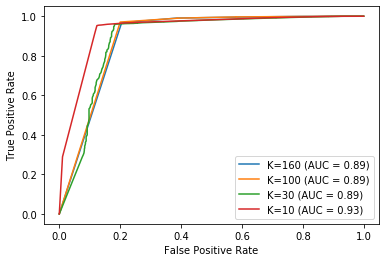

In [6]:
#part 4
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(rfc, X_test, y_test,name='K=160')
plot_roc_curve(rfc_100, X_test_100, y_test_100, ax=disp.ax_,name='K=100')
plot_roc_curve(rfc_30, X_test_30, y_test_30, ax=disp.ax_,name='K=30')
plot_roc_curve(rfc_10, X_test_10, y_test_10, ax=disp.ax_,name='K=10')

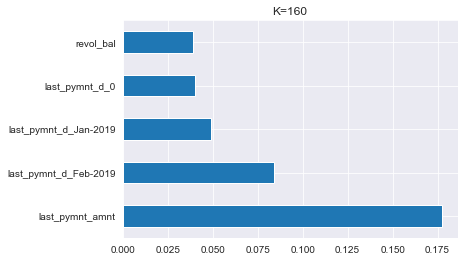

In [7]:
#part 5
import seaborn as sns
sns.set_style('darkgrid')

feat_importances = pd.Series(rfc.feature_importances_, index=df.drop(['loan_status'],axis=1).columns)
feat_importances.nlargest(5).plot(kind='barh', title='K=160')

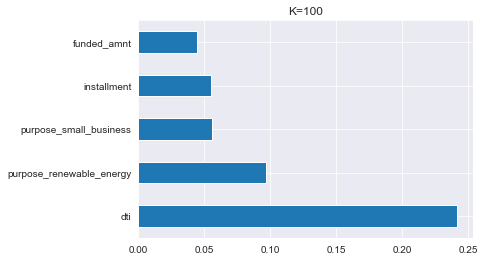

In [8]:
selector_100 = SelectKBest(chi2, k=100)
selector_100.fit(X_100, y)
cols_100 = selector_100.get_support(indices=True)

feat_importances_100 = pd.Series(rfc_100.feature_importances_, index=df.iloc[:,cols_100].columns)
feat_importances_100.nlargest(5).plot(kind='barh', title='K=100')

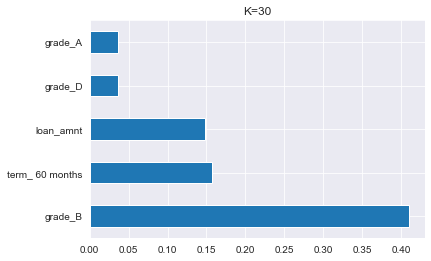

In [9]:
selector_30 = SelectKBest(chi2, k=30)
selector_30.fit(X_30, y)
cols_30 = selector_30.get_support(indices=True)

feat_importances_30 = pd.Series(rfc_30.feature_importances_, index=df.iloc[:,cols_30].columns)
feat_importances_30.nlargest(5).plot(kind='barh', title='K=30')

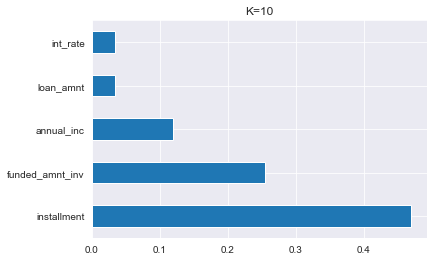

In [10]:
selector_10 = SelectKBest(chi2, k=10)
selector_10.fit(X_10, y)
cols_10 = selector_10.get_support(indices=True)

feat_importances_10 = pd.Series(rfc_10.feature_importances_, index=df.iloc[:,cols_10].columns)
feat_importances_10.nlargest(5).plot(kind='barh', title='K=10')

## Part 6

From the ROC curves, we observe that K=10 performs the best out of all 4 models. K=30 performs marginally better than K=100 and K=160, which perform very similarly. The main increase in performance from the K=10 model comes from a lower false positive rate.

# Question 3 : Logistic Regression with Regularization and Decision Tree

The goal of this problem is to explore the effect of regularization on logistic regression for binary classification, we will be using the diabetes dataset. 
This dataset is used to predict if a person is having 
diabetes based on feature variables including blood pressure, bmi, age etc. The target variable is stored in "outcome" column.

* Load the "diabetes.csv" and partition it into features (X) and the target label (y) for classification task. Then, use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split data into training and testing: test_size=0.33, random_state=42. 


* We need to use [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Instead of fitting a model on the original data, we use StandardScaler to center each feature. Also remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y. 

   Note: X should have 8 features.


**Part 1:** Fit a [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model with penalty $l2$
(Ridge Regularization) for the following values of regularization  C = $[0.0001,0.001,0.1,10,100]$ using the training data. Report the accuracy score on the test data averaged over 5 runs of the model for each of the C values. 

  Note : Smaller values of C indicate stronger regularization

    

**Part 2:** Fit a [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) classifier on the training data, and report the accuracy score on the test data averaged over 5 runs. Briefly explain which of the models performed the best Logistic Regression + regularization or Decision Tree Classifier and why. 


* Now, We will check if the decision boundary from logistic regression is linear by using a 2D plot.


**Part 3:** Select the top two most important features ([Feature importance](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)) using the training data with a Decision Tree Classifier and random_state = 10. Subset the train and test data to have only the selected features. This will be used as the training and test data for part $4$.


**Part 4:** Fit a [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model with penalty = $l2$, C = 10 (Ridge Regularization) and random state = 0 for the training data from part $3$ . Plot the decision boundary of the logistic regression model with the two features, as X and Y axis. Here is an [example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html) . Plot the scatter points for the test data, on the same graph showing the two classes as two different color. 

  * Hint : You can use the below limits for plotting the decision boundary, where $X[:,0]$ indicates feature 1 values and $X[:,1]$ indicates feature 2 values of the train dataset. 

     $ x_\min, x_\max = X[:, 0].min() - .5, X[:, 0].max() + .5 $ 

     $ y_\min, y_\max = X[:, 1].min() - .5, X[:, 1].max() + .5 $
   

# Solution

#### Loading dataset and pre-processing

In [11]:
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('diabetes.csv')
y=df['Outcome']
X=df.drop('Outcome', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.fit_transform(X_test)

#### Part 1 

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


clf_0001 = LogisticRegression(penalty = 'l2',C = 0.0001)
clf_0001.fit(X_train,y_train)
print('Accuracy score with Regularization = 0.0001: ',np.mean(cross_val_score(clf_0001, X_test, y_test, cv = 5)))


clf_001 = LogisticRegression(penalty = 'l2',C = 0.001)
clf_001.fit(X_train,y_train)
print('Accuracy score with Regularization = 0.0001: ',np.mean(cross_val_score(clf_001, X_test, y_test, cv = 5)))

      
clf_01 = LogisticRegression(penalty = 'l2',C = 0.1)
clf_01.fit(X_train,y_train)
print('Accuracy score with Regularization = 0.1: ',np.mean(cross_val_score(clf_01, X_test, y_test, cv = 5)))


clf_10 = LogisticRegression(penalty = 'l2',C = 10)
clf_10.fit(X_train,y_train)
print('Accuracy score with Regularization = 10: ',np.mean(cross_val_score(clf_10, X_test, y_test, cv = 5)))


clf_100 = LogisticRegression(penalty = 'l2',C = 100)
clf_100.fit(X_train,y_train)
print('Accuracy score with Regularization = 100: ',np.mean(cross_val_score(clf_100, X_test, y_test, cv = 5)))




Accuracy score with Regularization = 0.0001:  0.6614117647058824
Accuracy score with Regularization = 0.0001:  0.6614117647058824
Accuracy score with Regularization = 0.1:  0.7637647058823529
Accuracy score with Regularization = 10:  0.7797647058823529
Accuracy score with Regularization = 100:  0.7836862745098039


#### Part 2 

In [13]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train,y_train)
tree.score(X_test,y_test)
scores = cross_val_score(tree, X_test, y_test, cv = 5)
print('Average Accuracy Score: ',np.mean(scores))

Average Accuracy Score:  0.6849411764705883


The Logistic Regression performs better because there is a clear linear boundary in this binary classification problem which is not as well separated by the multiple splits of the decision tree.

#### Part 3

In [14]:

new_tree = DecisionTreeClassifier(random_state = 10)
new_tree.fit(X_train,y_train)
new_tree.feature_importances_

var_list = []
for i in range(1,len(new_tree.feature_importances_)):
    if new_tree.feature_importances_[i] > .11:
        var_list.append(i)
        
most_important = list(X.iloc[:, var_list].columns)
most_important
new_tree.feature_importances_


array([0.06204322, 0.40446797, 0.10523598, 0.04853007, 0.08183749,
       0.14079905, 0.07235549, 0.08473073])

In [15]:
best_features = X.iloc[:, var_list]
X_train, X_test, y_train, y_test = train_test_split(best_features, y, test_size = .33, random_state = 42)
X_train

,Glucose,BMI
464,115,24.0
223,142,28.8
393,116,22.1
766,126,30.1
570,78,32.5
...,...,...
71,139,28.6
106,96,22.4
270,101,45.6
435,141,42.4


#### Part 4

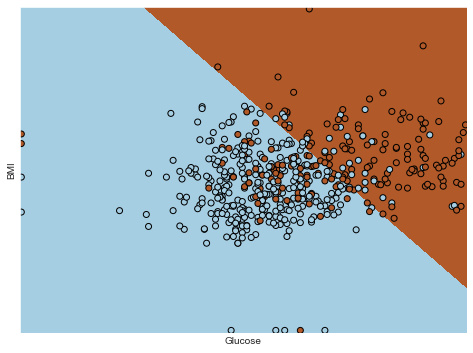

In [16]:
import matplotlib.pyplot as plt
clf_4 = LogisticRegression(penalty = 'l2', C = 10, random_state = 0)
clf_4.fit(X_train,y_train)

x_min, x_max = X_train.iloc[:, 0].min() - .5, X_train.iloc[:, 0].max() + .5
y_min, y_max = X_train.iloc[:, 1].min() - .5, X_train.iloc[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf_4.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Glucose')
plt.ylabel('BMI')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

# Question 4 - Comparison of different ensembles method for classification

In this question, we will compare performance of different ensemble methods for classification problems: [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html), [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html), [GradientBoosting](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) Classifiers.

[Spam Classification Data](https://archive.ics.uci.edu/ml/datasets/Spambase) of UCI will be used (you can use the data provided: 'spam_uci.csv'). Don't worry about column names. The last column represents target label, 1 if spam and zero otherwise.

* Load the data and partition it into features (X) and the target label (y) for classification task. Then, use [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split data into training and testing: test_size=0.33, random_state=42. 



**Part 1:** Use a Decision Tree Classifier with random_state = 10 and Logistic Regression with random_state = 10 and solver ="lbfgs" for the spam classification problem. Report the accuracy_score and roc_auc_score on the test data for each classifier.


**Part 2:** Create an ensemble of 50 classifiers (i.e n_estimators = 50) with random_state = 10 for [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) with base classifier as Decision Tree Classifier and Logistic Regression from part $1$ . Report accuracy_score and roc_auc_score on the test data for both the Bagging classifiers. Compare the results and breifly explain the effect of using bagging for the spam classification problem for both the Logistic Regression and Decision Tree base classifier.


* Now we will look at the effect of other ensemble methods on this problem.


**Part 3:** Use a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to classify whether an email is spam. Report your testing accuracy ([accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)) and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score). You will need [predict_proba](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) for roc_auc_score. 


**Part 4:** Use [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (GBDT), and [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for the spam classification problem.  Report  accuracy_score and roc_auc_score on the test data for each algorithm. 

  Note : For part 3 and 4 find the best values for the hyper parameters of each of the models by using GridSearchCV. 


**Part 5:** Briefly explain which of the three ensemble method above from Part 3&4 performed the best and why?


# Solution

#### Loading and pre-processing dataset

In [17]:
df = pd.read_csv('spambase.data')
X = df.drop(['1'],axis=1)
y = df['1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Part 1

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

dtc = DecisionTreeClassifier(random_state=10)
lr = LogisticRegression(random_state=10,solver='lbfgs')

dtc.fit(X_train, y_train)
lr.fit(X_train, y_train)

dtc_preds = dtc.predict(X_test)
lr_preds = lr.predict(X_test)

print('decision tree\n---')
print('roc_auc_score:',str(roc_auc_score(y_test, dtc_preds)))
print('accuracy score:',str(accuracy_score(y_test, dtc_preds)))
print('\nlogistic regression\n---')
print('roc_auc_score:',str(roc_auc_score(y_test, lr_preds)))
print('accuracy score:',str(accuracy_score(y_test, lr_preds)))

decision tree
---
roc_auc_score: 0.9123892146624896
accuracy score: 0.9156785243741765

logistic regression
---
roc_auc_score: 0.8933220874501299
accuracy score: 0.9005270092226614


#### Part 2

In [19]:
from sklearn.ensemble import BaggingClassifier

bc_dtc = BaggingClassifier(base_estimator=dtc, n_estimators=50, random_state=10)
bc_lr = BaggingClassifier(base_estimator=lr, n_estimators=50, random_state=10)

bc_dtc.fit(X_train, y_train)
bc_lr.fit(X_train, y_train)

bc_dtc_preds = bc_dtc.predict(X_test)
bc_lr_preds = bc_lr.predict(X_test)

print('using decision tree as base classifier\n---')
print('roc_auc_score:',str(roc_auc_score(y_test, bc_dtc_preds)))
print('accuracy score:',str(accuracy_score(y_test, bc_dtc_preds)))
print('\nusing logistic regression as base classifier\n---')
print('roc_auc_score:',str(roc_auc_score(y_test, bc_lr_preds)))
print('accuracy score:',str(accuracy_score(y_test, bc_lr_preds)))

using decision tree as base classifier
---
roc_auc_score: 0.9337376496104104
accuracy score: 0.9387351778656127

using logistic regression as base classifier
---
roc_auc_score: 0.9006560098535358
accuracy score: 0.9064558629776021


#### Part 3

In [20]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=10)
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto','sqrt','log2'],
    'max_depth': [4,6,8],
    'criterion': ['gini','entropy']
}

cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
cv_rf.fit(X_train, y_train)

rf_prob_preds = cv_rf.predict_proba(X_test)[:,1]
rf_preds = cv_rf.predict(X_test)

print('roc_auc_score:',str(roc_auc_score(y_test,rf_prob_preds)))
print('accuracy score:',str(accuracy_score(y_test, rf_preds)))

roc_auc_score: 0.9752287109183246
accuracy score: 0.9235836627140975
Wall time: 2min 39s


#### Part 4

In [21]:
%%time
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

gbdt = GradientBoostingClassifier(random_state=10)
abc = AdaBoostClassifier(random_state=10)

param_grid = {
    'n_estimators': [200,500],
    'learning_rate':[.001,0.01,.1]
}

cv_gbdt = GridSearchCV(estimator=gbdt, param_grid=param_grid, cv=5)
cv_abc = GridSearchCV(estimator=abc, param_grid=param_grid, cv=5)

cv_gbdt.fit(X_train, y_train)
cv_abc.fit(X_train, y_train)

gbdt_prob_preds = cv_gbdt.predict_proba(X_test)[:,1]
gbdt_preds = cv_gbdt.predict(X_test)
abc_prob_preds = cv_abc.predict_proba(X_test)[:,1]
abc_preds = cv_abc.predict(X_test)

print('Gradient Boosting Decision Tree\n---')
print('roc_auc_score:',str(roc_auc_score(y_test, gbdt_prob_preds)))
print('accuracy score:',str(accuracy_score(y_test, gbdt_preds)))
print('\nAdaBoost\n---')
print('roc_auc_score:',str(roc_auc_score(y_test, abc_prob_preds)))
print('accuracy score:',str(accuracy_score(y_test, abc_preds)))

Gradient Boosting Decision Tree
---
roc_auc_score: 0.9848475111789434
accuracy score: 0.9420289855072463

AdaBoost
---
roc_auc_score: 0.9819691005971027
accuracy score: 0.9361001317523057
Wall time: 1min 56s


#### Part 5 

The gradient boosting decision tree model performed the best. 

This model outperforms random forests because it uses boosting to reduce error mainly through reducing bias with shallow trees. Random forests use fully grown decision trees and makes a lot of trees to reduce variance. Most likely, gradient boosting was able to generate trees with lower bias than the trees of random forests, resulting in better performance.

This model outperforms Adaboost because while both techniques use boosting, Adaboost puts more weight on misclassified observations. Gradient boosting can also use larger trees compared to AdaBoost which only uses stumps. Most likely, there wwas more information gained through gradient boosting by putting equal weight for all learners than the AdaBoost predictions which weights the learners' predictions based on their accuracy.


# Question 5: Segmenting Customers for Predicting Credit Card Fraud 

In this question, we will look at a technique to segment customers using SHAP (SHapley Additive exPlanations). Please read this article to learn about SHAP - https://christophm.github.io/interpretable-ml-book/shap.html.

SHAP values provide an explanation for each observation in terms of feature attribution (which features were most influential in determining the predicted value for that observation).

For some applications, that may be too fine a resolution, and one would rather identify subsets of observations (called segments or clusters) for which the “explanations are similar”, Moreover, it helps if subsets are also “understandable”, i.e. easy to describe in terms of the feature values. Then the subsets become “actionable”, as one can design specific interventions (e.g. targeted marketing messages) for each subset.

The goal of this problem is to identify such segments, and see if the variation of SHAP values within each segment is indeed lower than the variation in the total population. We will proceed as follows:

1. First, we will fit an XGBoost model to perform the classification task.
2. We will then use the shap.TreeExplainer which uses Tree SHAP algorithms and estimate the SHAP values for each observation.
3. Our objective is to segment customers into groups which have low variance in the SHAP values - these represent segments of similar customers in the “feature attribution based explanation” space. We will do this as follows:  

    a. Cluster the SHAP values using KMeans clustering. You pick K, perhaps somewhere between 10 and 20.  
    b. Build a decision tree with the Cluster numbers as the labels. Specify the number of leaves to be in the range of [K, 2K].  Due to the choice of the surrogate class labels provided by the clustering, the   leaves of the decision tree will be encouraged to have similar SHAP values. Moreover, since you are learning a decision tree, these leaves are also simple to describe as rules. A good solution will be indicated if  for each of these leaves,  the variance of SHAP values of observations mapped to that leaf will be lower than the  overall variance.  


In [22]:
#LOADING DATA -  DONOT CHANGE

import re
import pandas as pd
import numpy as np
import shap
import time
import xgboost
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import os, sys, re
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('credit.csv')

X = df
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df.columns.values]

X = X.drop(['Class'], axis=1)
Y = df['Class']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, shuffle=True, random_state=42)

### 5.1. Fit an XGBoost model on the train data and report the ROCAUC on the test set. 
### 5.2. Compute the SHAP values using the [TreeExplainer](https://shap.readthedocs.io/en/latest/generated/shap.TreeExplainer.html) and plot the [summary plot](https://shap.readthedocs.io/en/latest/generated/shap.summary_plot.html). Explain what the summary plot represents. 
### 5.3. Perform KMeans clustering on the SHAP values inot $k$ clusters. Then, train a decision tree (with maximum depth $d$) to predict the cluster number obtained through KMeans -  the cluster numbers as the target. Visualize the decison tree. Plot the variance of the SHAP values of the samples in each of the leaves - show that all these varinces is less than the overall variance of the SHAP values. The main parameters to tune here are the number of cluster $k$ and the maximum depth $d$. 

In [23]:
#5.1
dtrain = xgboost.DMatrix(X_train, label=y_train)
dtest = xgboost.DMatrix(X_test, label=y_test)

param = {
    'max_depth': 6,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
}
num_round = 20  # the number of training iterations

xgb_model = xgboost.train(param, dtrain, num_round)

preds = xgb_model.predict(dtest)

In [24]:
#5.1
print('roc_auc_score:',str(roc_auc_score(y_test, preds)))

roc_auc_score: 0.9539125431530494


In [25]:
#5.2 shap values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(dtrain)
print('shap values\n-----------')
print(shap_values)

shap values
-----------
[[ 1.07818181e-04  0.00000000e+00  3.51861090e-05 ... -1.45032736e-05
   4.36543905e-06  1.35966366e-06]
 [-4.75055913e-06  0.00000000e+00 -1.98238340e-05 ... -1.26323785e-05
   3.45180115e-06 -7.13823465e-06]
 [-4.89978156e-05  0.00000000e+00  4.21301993e-05 ... -1.26323785e-05
   4.35472793e-06  5.93763616e-07]
 ...
 [-4.92941945e-05  0.00000000e+00  5.43447859e-05 ... -1.26323785e-05
   4.46878767e-06  1.35966366e-06]
 [-8.85479094e-05  0.00000000e+00 -1.47608216e-05 ... -1.26323785e-05
   4.36462733e-06 -7.13823465e-06]
 [-1.76774174e-05  0.00000000e+00  3.81702284e-06 ... -1.45032736e-05
   3.57004569e-06  1.35966366e-06]]


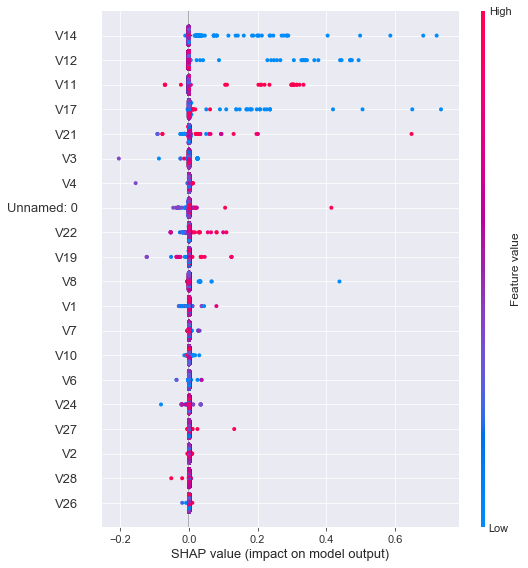

In [26]:
#5.2 summary plot
shap.summary_plot(shap_values, X_train)

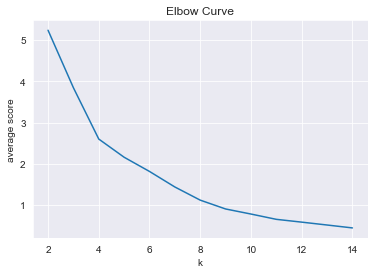

Chosen k: 4


In [27]:
#5.3
"""
Perform KMeans clustering on the SHAP values into  𝑘  clusters. 

"""
from sklearn.cluster import KMeans
import pylab as pl

s = pd.DataFrame(shap_values, columns = X_test.columns)
#Use Elbow method to decide the optimal number of clusters
sse = []
for k in range(2,15):
    kmeans = KMeans(n_clusters = k)
    #fit the k-means model on the shap values
    kmeans.fit(s)
    #appent the error of each iteration
    sse.append(kmeans.inertia_)
   
pl.plot(range(2,15), sse)
pl.title("Elbow Curve")
pl.xlabel('k')
pl.ylabel('average score')
pl.show()
print('Chosen k: 4')

[Text(167.40000000000003, 195.696, 'X[12] <= 0.001\ngini = 0.003\nsamples = 16020\nvalue = [15992, 20, 3, 5]'),
 Text(66.96000000000001, 152.208, 'X[23] <= 0.036\ngini = 0.0\nsamples = 15994\nvalue = [15991, 0, 2, 1]'),
 Text(33.480000000000004, 108.72, 'gini = 0.0\nsamples = 15991\nvalue = [15991, 0, 0, 0]'),
 Text(100.44000000000001, 108.72, 'X[15] <= 0.361\ngini = 0.444\nsamples = 3\nvalue = [0, 0, 2, 1]'),
 Text(66.96000000000001, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0]'),
 Text(133.92000000000002, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]'),
 Text(267.84000000000003, 152.208, 'X[13] <= 0.14\ngini = 0.382\nsamples = 26\nvalue = [1, 20, 1, 4]'),
 Text(234.36, 108.72, 'X[28] <= 0.0\ngini = 0.5\nsamples = 6\nvalue = [1, 0, 1, 4]'),
 Text(200.88000000000002, 65.232, 'X[25] <= 0.014\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1, 0]'),
 Text(167.40000000000003, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]'),
 Text(234.36, 21.744, 'gini = 0.0\nsamples = 

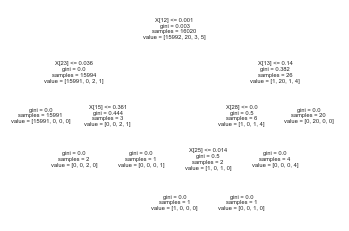

In [28]:
#5.3
"""
Then, train a decision tree (with maximum depth  𝑑 ) to predict 
the cluster number obtained through KMeans - the cluster numbers 
as the target. Visualize the decison tree. Plot the variance
of the SHAP values of the samples in each of the leaves - show that 
all these varinces is less than the overall variance of the SHAP values. 
The main parameters to tune here are the number of cluster  𝑘  and the 
maximum depth  𝑑 .
"""
kmeans = KMeans(n_clusters = 4)
kmeans.fit(shap_values)
dtc = DecisionTreeClassifier(random_state = 0, max_depth = 10)

X = shap_values
Y = kmeans.labels_

dtc.fit(X,Y)

from sklearn import tree
tree.plot_tree(dtc)

In [29]:
print('overall variance of shap values:',str(np.var(shap_values)))

overall variance of shap values: 2.1538575e-05


In [30]:
import collections

samples = collections.defaultdict(list)
decision_paths = dtc.decision_path(X)

for d, dec in enumerate(decision_paths):
    for i in range(dtc.tree_.node_count):
        if dec.toarray()[0][i] == 1:
            samples[i].append(X[d])

for sample in samples:
    sample_tree = np.array(samples[sample])
    print('Leaf Node ', sample, 'variance:', sample_tree.var())

Leaf Node  0 variance: 2.1538575e-05
Leaf Node  1 variance: 5.7762118e-06
Leaf Node  2 variance: 3.2345054e-06
Leaf Node  6 variance: 0.008766874
Leaf Node  12 variance: 0.008146586
Leaf Node  7 variance: 0.01080902
Leaf Node  11 variance: 0.012003264
Leaf Node  3 variance: 0.012581297
Leaf Node  5 variance: 0.01169124
Leaf Node  4 variance: 0.013025139
Leaf Node  8 variance: 0.008262438
Leaf Node  9 variance: 0.002355361
Leaf Node  10 variance: 0.013663957
